<a href="https://colab.research.google.com/github/LambdaTheda/DS-Unit-2-Linear-Models/blob/master/10_45p_Copy_of_latest_sun_mar_01_unit_2_sprint_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science, Unit 2_

# Applied Modeling Sprint Challenge: Predict Chicago food inspections 🍕

For this Sprint Challenge, you'll use a dataset with information from inspections of restaurants and other food establishments in Chicago from January 2010 to March 2019. 

[See this PDF](https://data.cityofchicago.org/api/assets/BAD5301B-681A-4202-9D25-51B2CAE672FF) for descriptions of the data elements included in this dataset.

According to [Chicago Department of Public Health — Food Protection Services](https://www.chicago.gov/city/en/depts/cdph/provdrs/healthy_restaurants/svcs/food-protection-services.html), "Chicago is home to 16,000 food establishments like restaurants, grocery stores, bakeries, wholesalers, lunchrooms, mobile food vendors and more. Our business is food safety and sanitation with one goal, to prevent the spread of food-borne disease. We do this by inspecting food businesses, responding to complaints and food recalls." 

#### Your challenge: Predict whether inspections failed

The target is the `Fail` column.

- When the food establishment failed the inspection, the target is `1`.
- When the establishment passed, the target is `0`.

#### Run this cell to install packages in Colab:

In [0]:
%%capture
import sys

if 'google.colab' in sys.modules:
    # Install packages in Colab
    !pip install category_encoders==2.*
    !pip install eli5
    !pip install pandas-profiling==2.*
    !pip install pdpbox
    !pip install shap

#### Run this cell to load the data:

In [0]:
import pandas as pd

train_url = 'https://drive.google.com/uc?export=download&id=13_tP9JpLcZHSPVpWcua4t2rY44K_s4H5'
test_url  = 'https://drive.google.com/uc?export=download&id=1GkDHjsiGrzOXoF_xcYjdzBTSjOIi3g5a'

train = pd.read_csv(train_url)
test  = pd.read_csv(test_url)

assert train.shape == (51916, 17)
assert test.shape  == (17306, 17)

### Part 1: Preprocessing

You may choose which features you want to use, and whether/how you will preprocess them. If you use categorical features, you may use any tools and techniques for encoding.

_To earn a score of 3 for this part, find and explain leakage. The dataset has a feature that will give you an ROC AUC score > 0.90 if you process and use the feature. Find the leakage and explain why the feature shouldn't be used in a real-world model to predict the results of future inspections._

### Part 2: Modeling

**Fit a model** with the train set. (You may use scikit-learn, xgboost, or any other library.) Use cross-validation or do a three-way split (train/validate/test) and **estimate your ROC AUC** validation score.

Use your model to **predict probabilities** for the test set. **Get an ROC AUC test score >= 0.60.**

_To earn a score of 3 for this part, get an ROC AUC test score >= 0.70 (without using the feature with leakage)._


### Part 3: Visualization

Make visualizations for model interpretation. (You may use any libraries.) Choose two of these types:

- Confusion Matrix
- Permutation Importances
- Partial Dependence Plot, 1 feature isolation
- Partial Dependence Plot, 2 features interaction
- Shapley Values

_To earn a score of 3 for this part, make four of these visualization types._

## Part 1: Preprocessing

> You may choose which features you want to use, and whether/how you will preprocess them. If you use categorical features, you may use any tools and techniques for encoding.

In [0]:
# Exploratory Data Analyses

In [5]:
train.describe()

,Inspection ID,License #,Zip,Latitude,Longitude,Fail
count,5.191600e+04,5.191100e+04,51890.000000,51718.000000,51718.000000,51916.000000
mean,1.330265e+06,1.549491e+06,60628.834669,41.879568,-87.676663,0.258610
std,6.202664e+05,9.018283e+05,22.736963,0.081126,0.059509,0.437875
min,4.425000e+04,0.000000e+00,60007.000000,41.644670,-87.914428,0.000000
25%,6.796205e+05,1.140745e+06,60614.000000,41.830296,-87.707857,0.000000
50%,1.424226e+06,1.958619e+06,60625.000000,41.890166,-87.666524,0.000000
75%,1.946952e+06,2.215507e+06,60643.000000,41.939167,-87.634461,1.000000
max,2.279709e+06,8.700606e+06,60827.000000,42.021064,-87.525094,1.000000


In [6]:
test.describe()

,Inspection ID,License #,Zip,Latitude,Longitude,Fail
count,1.730600e+04,1.730400e+04,17298.000000,17245.000000,17245.000000,17306.000000
mean,1.323403e+06,1.562543e+06,60628.920338,41.879518,-87.676646,0.258581
std,6.240521e+05,8.947393e+05,23.462366,0.080895,0.059617,0.437867
min,4.426100e+04,0.000000e+00,60007.000000,41.644670,-87.914428,0.000000
25%,6.709562e+05,1.145506e+06,60614.000000,41.830619,-87.708016,0.000000
50%,1.418794e+06,1.964748e+06,60625.000000,41.890300,-87.666898,0.000000
75%,1.946488e+06,2.208688e+06,60643.000000,41.938989,-87.634501,1.000000
max,2.279564e+06,3.759896e+06,60827.000000,42.021064,-87.525872,1.000000


In [7]:
train.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Violations,Latitude,Longitude,Location,Fail
0,2088270,"TOM YUM RICE & NOODLE, INC.",TOM YUM CAFE,2354911.0,Restaurant,Risk 1 (High),608 W BARRY,CHICAGO,IL,60657.0,2017-09-15T00:00:00,Canvass,3. POTENTIALLY HAZARDOUS FOOD MEETS TEMPERATUR...,41.938007,-87.644755,"{'longitude': '-87.6447545707008', 'latitude':...",1
1,555268,FILLING STATION & CONVENIENCE STORE,FILLING STATION & CONVENIENCE STORE,1044901.0,Grocery Store,Risk 3 (Low),6646-6658 S WESTERN AVE,CHICAGO,IL,60636.0,2011-10-20T00:00:00,Complaint Re-Inspection,32. FOOD AND NON-FOOD CONTACT SURFACES PROPERL...,41.772402,-87.683603,"{'longitude': '-87.68360273081268', 'latitude'...",0
2,1751394,A P DELI,A P DELI,47405.0,Restaurant,Risk 1 (High),2025 E 75TH ST,CHICAGO,IL,60649.0,2016-04-05T00:00:00,Canvass Re-Inspection,"35. WALLS, CEILINGS, ATTACHED EQUIPMENT CONSTR...",41.758779,-87.575054,"{'longitude': '-87.57505446746121', 'latitude'...",0
3,1763905,FRANK'S CHICAGO SHRIMP HOUSE,FRANK'S CHICAGO SHRIMP HOUSE,6414.0,Restaurant,Risk 2 (Medium),4459 S ARCHER AVE,CHICAGO,IL,60632.0,2016-04-29T00:00:00,Canvass,38. VENTILATION: ROOMS AND EQUIPMENT VENTED AS...,41.812181,-87.707125,"{'longitude': '-87.70712481334274', 'latitude'...",0
4,453326,MORRILL,MORRILL,24571.0,School,Risk 1 (High),6011 S Rockwell (2600W) AVE,CHICAGO,IL,60629.0,2011-01-10T00:00:00,Canvass,"34. FLOORS: CONSTRUCTED PER CODE, CLEANED, GOO...",NaN,NaN,NaN,0


In [8]:
test.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Violations,Latitude,Longitude,Location,Fail
0,114835,7 - ELEVEN,7 - ELEVEN,46907.0,Grocery Store,Risk 2 (Medium),600 S DEARBORN,CHICAGO,IL,60605.0,2011-03-22T00:00:00,Canvass,33. FOOD AND NON-FOOD CONTACT EQUIPMENT UTENSI...,41.874481,-87.629357,"{'longitude': '-87.62935653990546', 'latitude'...",0
1,1575555,TAQUERIA LOS GALLOS INC,TAQUERIA LOS GALLOS,1044860.0,Restaurant,Risk 1 (High),4209-4211 W 26TH ST,CHICAGO,IL,60623.0,2015-09-15T00:00:00,Canvass,"30. FOOD IN ORIGINAL CONTAINER, PROPERLY LABEL...",41.844070,-87.729807,"{'longitude': '-87.72980747367433', 'latitude'...",0
2,671061,TROTTER'S TO GO,TROTTER'S TO GO,1092634.0,Restaurant,Risk 1 (High),1337 W FULLERTON AVE,CHICAGO,IL,60614.0,2012-03-02T00:00:00,Canvass,"34. FLOORS: CONSTRUCTED PER CODE, CLEANED, GOO...",41.925128,-87.662041,"{'longitude': '-87.66204067083224', 'latitude'...",0
3,1965844,BIG G'S PIZZA,BIG G'S PIZZA,2334691.0,Restaurant,Risk 1 (High),1132 W TAYLOR ST,CHICAGO,IL,60607.0,2016-10-04T00:00:00,Canvass Re-Inspection,"14. PREVIOUS SERIOUS VIOLATION CORRECTED, 7-42...",41.869546,-87.655501,"{'longitude': '-87.65550098867566', 'latitude'...",1
4,1751669,SOUTH CENTRAL COMMUNITY SERVICES ELEMENTARY,SOUTH CENTRAL COMMUNITY SERVICES ELEMENTARY,3491970.0,School,Risk 2 (Medium),1021 E 83RD,CHICAGO,IL,60619.0,2016-04-08T00:00:00,Canvass,18. NO EVIDENCE OF RODENT OR INSECT OUTER OPEN...,41.743933,-87.599291,"{'longitude': '-87.59929083361996', 'latitude'...",1


In [9]:
# check Nulls
train.isnull().sum()

Inspection ID         0
DBA Name              0
AKA Name            623
License #             5
Facility Type       224
Risk                 12
Address               0
City                 53
State                10
Zip                  26
Inspection Date       0
Inspection Type       1
Violations         9655
Latitude            198
Longitude           198
Location            198
Fail                  0
dtype: int64

In [10]:
test.isnull().sum()

Inspection ID         0
DBA Name              0
AKA Name            222
License #             2
Facility Type        87
Risk                  7
Address               0
City                 18
State                 2
Zip                   8
Inspection Date       0
Inspection Type       0
Violations         3280
Latitude             61
Longitude            61
Location             61
Fail                  0
dtype: int64

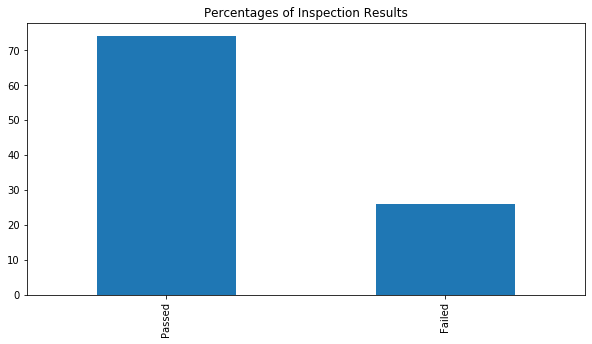

In [11]:
# check 'Fail' class imbalance via a Plot: Pass Vs Fail
(train['Fail'].map({0: 'Passed', 1: 'Failed'}).value_counts(normalize=True) * 100)\
  .plot.bar(title='Percentages of Inspection Results', figsize=(10, 5))

In [0]:
# Drop 'AKA Name' column in train set since I will use the "DBA Name" column and the former has nulls while the latter does not,
# and both serve similar enough functions as a business identifier for my purposes
train = train.drop(columns=['AKA Name'])

In [13]:
y = train['Fail']
y.unique()

array([1, 0])

In [14]:
'''
Which evaluation measure is appropriate to use for a classification model with imbalanced classes?
Precision metric tells us how many predicted samples are relevant i.e. our mistakes into classifying sample as a correct one if it's not true. this metric is a good choice for the imbalanced classification scenario.May 9, 2019

Metrics for Imbalanced Classification - Towards Data Science
'''
# May use PRECISION METRIC? (instead of Accuracy in ntbk) for validation because our 2 class ratio is about 3:1; ~significant imbalance

# TEST INSTRUCTION: estimate your ROC AUC validation score

# find how many of Pass and Failed in our train['Fail']
y.value_counts(normalize=True)

0    0.74139
1    0.25861
Name: Fail, dtype: float64

In [0]:
import pandas as pd 
# from LS_DSPT4_231.ipynb (Mod 1)

'''
Next, do a time-based split:
Brief Description: This dataset contains information from inspections of restaurants and other
food establishments in Chicago from January 1, 2010 to the present. 
'''

train['Inspection Date'] = pd.to_datetime(train['Inspection Date'])

In [0]:
# TRIED to split val from train, but got AttributeError: Can only use .dt accessor with datetimelike values..
# may have to feature engineer Inspection Date to parse out only date!

# Attempt 2: Parsing out only YEAR from train['Inspection Date'] - works!
train['Inspection Date'] = pd.to_datetime(train['Inspection Date'])
train['Inspection Year'] = train['Inspection Date'].dt.year

test['Inspection Date'] = pd.to_datetime(test['Inspection Date'])
test['Inspection Year'] = test['Inspection Date'].dt.year


In [0]:
# split_train = train[train['Inspection Date'].dt.year <= 2016]
# val = train[train['Inspection Date'].dt.year > 2017]

# Check if ~80 % train; 20% val split was chosen
#split_train.shape, val.shape

In [18]:

# May fine tune split using months additionally
'''
val.value_counts(normalize=True) (gives err df obj has no val_cnts attrib..)

# check 'Fail' class imbalance via a Plot: Pass Vs Fail
# ?!?!
# (train_split['Inspection Year'].map({ ('Inspection Year'<= 2016): 'train_split', 1: 'Failed'}).value_counts(normalize=True) * 100)\
# .plot.bar(title='Percentages of Inspection Results', figsize=(10, 5))
'''

"\nval.value_counts(normalize=True) (gives err df obj has no val_cnts attrib..)\n\n# check 'Fail' class imbalance via a Plot: Pass Vs Fail\n# ?!?!\n# (train_split['Inspection Year'].map({ ('Inspection Year'<= 2016): 'train_split', 1: 'Failed'}).value_counts(normalize=True) * 100)# .plot.bar(title='Percentages of Inspection Results', figsize=(10, 5))\n"

In [0]:
train['Any Failed'] = train.groupby('Address')['Fail'].transform(lambda x: int((x == 1).any()))
test['Any Failed'] = test.groupby('Address')['Fail'].transform(lambda x: int((x == 1).any()))

## Part 2: Modeling

> **Fit a model** with the train set. (You may use scikit-learn, xgboost, or any other library.) Use cross-validation or do a three-way split (train/validate/test) and **estimate your ROC AUC** validation score.
>
> Use your model to **predict probabilities** for the test set. **Get an ROC AUC test score >= 0.60.**

In [0]:
#ATTEMPT 2: getting invalid type promotion err

# Try a shallow decision tree as a fast, first model

import category_encoders as ce
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

target = 'Fail'
# features = ['Inspection Type', 'Any Failed', 'Facility Type', 'Latitude', 'Longitude']
features = ['Inspection Type', 'Zip', 'Any Failed', 'License #', 'Facility Type', 'Latitude', 'Longitude']

X_train, X_test, y_train, y_test = train_test_split(train[features], train[target])

pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='most_frequent'),
    RandomForestClassifier()
)

pipeline.fit(X_train, y_train)
acc_score = pipeline.score(test[features], test[target])
ra_score = roc_auc_score(test[target], pipeline.predict(test[features]))

print(f'Test Accuracy: {pipeline.score(X_test, y_test)}')
print(f'Test ROC AUC: {roc_auc_score(y_test, pipeline.predict(X_test))}\n')

print(f'Val Accuracy: {acc_score}')
print(f'Val ROC AUC: {ra_score}')

## Part 3: Visualization

> Make visualizations for model interpretation. (You may use any libraries.) Choose two of these types:
>
> - Permutation Importances
> - Partial Dependence Plot, 1 feature isolation
> - Partial Dependence Plot, 2 features interaction
> - Shapley Values

In [0]:
#Perm Impt: https://colab.research.google.com/drive/1z1R0m3XsaZMjukynx2Ub-531Sh32xPln#scrollTo=QxhmJFxvKDbM (u2s3m3) 

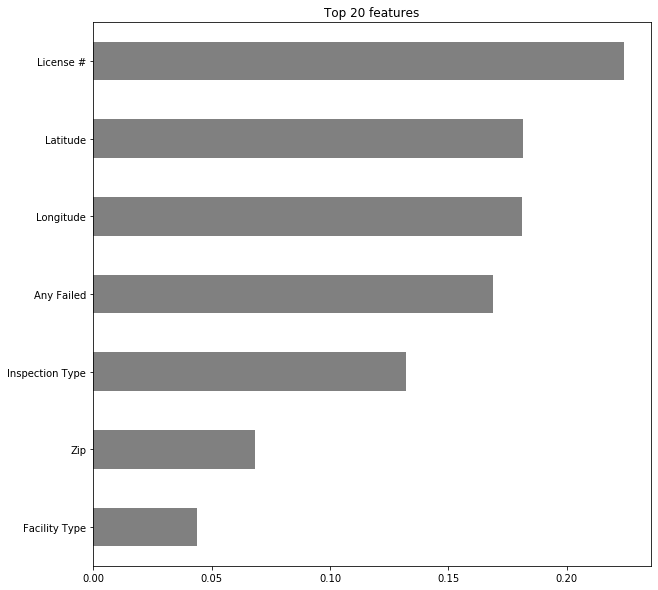

In [27]:
# 1) PERMUTATION IMPORTANCES
#    a) just to peek at which features are important to our model, get feature importances
rf = pipeline.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, X_train.columns)

# Plot feature importances
%matplotlib inline
import matplotlib.pyplot as plt

n = 20
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='grey');

In [28]:
# BEFORE: Sequence of the feature to be permuted: from Features Importance above, chose Latitude adn Inspection type columns/features to Permute
import numpy as np
for feature in ['Latitude', 'Inspection Type']:

# PERMUTE
  X_train_permuted = X_train.copy() #copy whole df to submit all at once
  X_train_permuted[feature] = np.random.permutation(X_train[feature])

  X_test_permuted = X_test.copy()
  X_test_permuted[feature] = np.random.permutation(X_test[feature])

  score = pipeline.score(X_test, y_test)
  score_permuted = pipeline.score(X_test_permuted, y_test) #Calc. accuracy on the permuted val dataset

  print(f'Validation accuracy with {feature}: {score}')
  print(f'Validation accuracy with {feature} permuted: {score_permuted}')
  print(f'Permutation importance: {acc_score - score_permuted}\n')

Validation accuracy with Latitude: 0.7466676939671778
Validation accuracy with Latitude permuted: 0.7516757839587025
Permutation importance: 0.0610481268236851

Validation accuracy with Inspection Type: 0.7466676939671778
Validation accuracy with Inspection Type permuted: 0.6775560520841359
Permutation importance: 0.13516785869825165



In [33]:
#2) Shapley Values: SHAP Values (an acronym from SHapley Additive exPlanations) break down a prediction to show the impact of each feature.
# from https://colab.research.google.com/drive/1r2VFMtBAt3sLVIQfsMWyQXt8hB9gziRA#scrollTo=Ep1aBVpVcrDj (FINAL VERSION 234 u2s3m4.ipynb)

import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier

processor = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median')
)

val = train[train['Inspection Date'].dt.year > 2017]
X_val = val[features]
y_val = val[target]

X_train_processed = processor.fit_transform(X_train)
X_val_processed = processor.transform(X_val)

eval_set = [(X_train_processed, y_train), 
            (X_val_processed, y_val)]

model = XGBClassifier(n_estimators=1000, n_jobs=-1)
model.fit(X_train_processed, y_train, eval_set=eval_set, eval_metric='auc', 
          early_stopping_rounds=10)

[0]	validation_0-auc:0.760194	validation_1-auc:0.767082
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.760194	validation_1-auc:0.767082
[2]	validation_0-auc:0.773123	validation_1-auc:0.781638
[3]	validation_0-auc:0.773123	validation_1-auc:0.781638
[4]	validation_0-auc:0.773123	validation_1-auc:0.781638
[5]	validation_0-auc:0.773209	validation_1-auc:0.781871
[6]	validation_0-auc:0.773209	validation_1-auc:0.781871
[7]	validation_0-auc:0.780834	validation_1-auc:0.790041
[8]	validation_0-auc:0.780834	validation_1-auc:0.790041
[9]	validation_0-auc:0.780834	validation_1-auc:0.790041
[10]	validation_0-auc:0.780834	validation_1-auc:0.790041
[11]	validation_0-auc:0.799053	validation_1-auc:0.803101
[12]	validation_0-auc:0.799053	validation_1-auc:0.803101
[13]	validation_0-auc:0.807124	validation_1-auc:0.813122
[14]	validation_0-auc:0.807124	validation_1-auc:0.81312

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [34]:
from sklearn.metrics import roc_auc_score
X_test_processed = processor.transform(X_test)
class_index = 1
y_pred_proba = model.predict_proba(X_test_processed)[:, class_index]
print(f'Test ROC AUC for class {class_index}:')
print(roc_auc_score(y_test, y_pred_proba)) # Ranges from 0-1, higher is better

Test ROC AUC for class 1:
0.8293915652428773


In [35]:
import shap

explainer = shap.TreeExplainer(model)
row_processed = processor.transform(row)
shap_values = explainer.shap_values(row_processed)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values, 
    features=row, 
    link='logit' # For classification, this shows predicted probabilities
)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


NameError: ignored

In [0]:
#********************  FROM 1ST TEST TAKING **************************

In [0]:
# 2) CONFUSION MATRIX -NM

In [0]:
#2) #Partial Dependence Plot, 1 feature interaction

'''
Later, when you save matplotlib images to include in blog posts or web apps,
increase the dots per inch (double it), so the text isn't so fuzzy
'''

import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 72

In [0]:
from sklearn.metrics import r2_score
from xgboost import XGBRegressor

gb = make_pipeline(
    ce.OrdinalEncoder(), 
    XGBRegressor(n_estimators=200, objective='reg:squarederror', n_jobs=-1)
)

gb.fit(X_train, y_train)
y_pred = gb.predict(X_val)
print('Gradient Boosting R^2', r2_score(y_val, y_pred))

In [0]:
from pdpbox.pdp import pdp_isolate, pdp_plot

feature = 'DBA'

isolated = pdp_isolate(
    model = gb,
    dataset=X_val,
    model_features=X_val.columns,
    feature=feature
)

In [0]:
pdp_plot(isolated, feature_name=feature);

In [0]:
pdp_plot(isolated, feature_name=feature);

In [0]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot
import category_encoders as ce
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

target = 'Fail'
features = df.columns.drop(['Fail'])

X = train[features]
y = train[target]

# Use Ordinal Encoder, outside of a pipeline
encoder = ce.OrdinalEncoder()
X_encoded = encoder.fit_transform(X)

model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_encoded, y)

In [0]:
# Use Pdpbox
%matplotlib inline
import matplotlib.pyplot as plt
from pdpbox import pdp
feature = 'Violation'
pdp_dist = pdp.pdp_isolate(model=model, dataset=X_encoded, model_features=features, feature=feature)
pdp.pdp_plot(pdp_dist, feature);

In [0]:
# Look at the encoder's mappings
encoder.mapping

In [0]:
pdp.pdp_plot(pdp_dist, feature)

# Manually change the xticks labels
plt.xticks([1, 2], ['Violations', 'Fail']);

In [0]:
# Let's automate it

feature = 'Violation'
for item in encoder.mapping:
    if item['col'] == feature:
        feature_mapping = item['mapping']
        
feature_mapping = feature_mapping[feature_mapping.index.dropna()]
category_names = feature_mapping.index.tolist()
category_codes = feature_mapping.values.tolist()

In [0]:
pdp.pdp_plot(pdp_dist, feature)

# Automatically change the xticks labels
plt.xticks(category_codes, category_names);

In [0]:
pdp.pdp_plot(pdp_dist, feature)

# Automatically change the xticks labels
plt.xticks(category_codes, category_names);

In [0]:
pdp = interaction.pdp.pivot_table(
    values='preds', 
    columns=features[0], # First feature on x axis
    index=features[1]    # Next feature on y axis
)[::-1]  # Reverse the index order so y axis is ascending

pdp = pdp.rename(columns=dict(zip(category_codes, category_names)))
plt.figure(figsize=(10,8))
sns.heatmap(pdp, annot=True, fmt='.2f', cmap='viridis')
plt.title('Partial Dependence of Inspection Failure, on Violation & Fails');

In [0]:
#Shapley
# Assign to X, y
features = ['Risk', 'Violations', 'Inspection Type']
target = 'Fail'
X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]

In [0]:
from scipy.stats import randint, uniform
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

param_distributions = { 
    'n_estimators': randint(50, 500), 
    'max_depth': [5, 10, 15, 20, None], 
    'max_features': uniform(0, 1), 
}

search = RandomizedSearchCV(
    RandomForestRegressor(random_state=42), #want CLassifier though?
    param_distributions=param_distributions, 
    n_iter=5, 
    cv=2, 
    scoring='neg_mean_absolute_error', 
    verbose=10, 
    return_train_score=True, 
    n_jobs=-1, 
    random_state=42
)

search.fit(X_train, y_train);

In [0]:
print('Best hyperparameters', search.best_params_)
print('Cross-validation MAE', -search.best_score_)
model = search.best_estimator_